<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ExergyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Exergy analysis
#@markdown Exergy analysis is a thermodynamic analysis technique based on the second law of thermodynamics which provides an alternative and illuminating means of assessing and comparing processes and systems rationally and meaningfully.
%%capture
!pip install neqsim

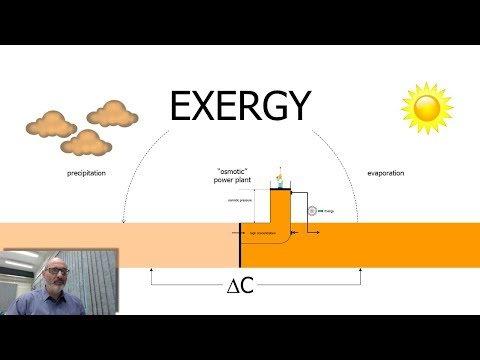

In [0]:
#@title  Exergy Analysis:
#@markdown integrating the 1st and 2nd laws of thermodynamics. https://www.youtube.com/watch?v=cD3nFnzviqA
from IPython.display import YouTubeVideo
YouTubeVideo('cD3nFnzviqA', width=600, height=400)


# Exergy
In thermodynamics, the exergy of a system is the maximum useful work possible during a process that brings the system into equilibrium with a heat reservoir, reaching maximum entropy.[1] When the surroundings are the reservoir, exergy is the potential of a system to cause a change as it achieves equilibrium with its environment. Exergy is the energy that is available to be used. After the system and surroundings reach equilibrium, the exergy is zero. Determining exergy was also the first goal of thermodynamics. The term "exergy" was coined in 1956 by Zoran Rant (1904–1972) by using the Greek ex and ergon meaning "from work"[1][3], but the concept was developed by J. Willard Gibbs in 1873.[4]

Energy is neither created nor destroyed during a process. Energy changes from one form to another (see First Law of Thermodynamics). In contrast, exergy is always destroyed when a process is irreversible, for example loss of heat to the environment (see Second Law of Thermodynamics). This destruction is proportional to the entropy increase of the system together with its surroundings (see Entropy production). The destroyed exergy has been called anergy.[2] For an isothermal process, exergy and energy are interchangeable terms, and there is no anergy.

https://en.wikipedia.org/wiki/Exergy

#Example of Exergy Calculation using NeqSim
THe exergy of a stream can be directly calculated in neasim. THe Exergy is defined as 

$e_x=(h_1 - h_0) - T_0(s_1-s_o)  $

Where $T_0$ is the temperature of the surroundings.

http://www.ivt.ntnu.no/ept/fag/tep4120/innhold/Exergy%20Light%20Version%203.pdf

Carnot efficiency:  0.10567473317129872
T_hot  200.0  T_cold  150.0  C
best Carnot efficiency (1-Tc/Th)  0.10567473317129872


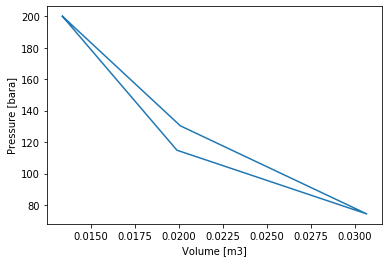

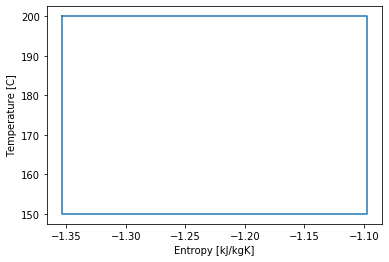

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater

Tsurr = 20.0

Tgas = 50.0
P_in = 20.0
P-out = 10.0



fluid_1 = fluid("srk")
fluid_1.addComponent("methane", 1.0, "kg/sec")
fluid_1.addComponent("ethane", 0.10, "kg/sec")
fluid_1.setTemperature(Tgas, "C")
fluid_1.setPressure(P_in, "bara")
TPflash(fluid_1)
T1 = fluid_1.getTemperature("C")
H1 = fluid_1.getEnthalpy("kJ/kg")
U1 = fluid_1.getInternalEnergy("kJ/kg")
S1 = fluid_1.getEntropy("kJ/kgK")
V1 = fluid_1.getVolume("m3")
E1 = fluid_1.getExergy("kJ/kg")



# The Carnot cycle when acting as a heat engine consists of the following steps:¨
# 1-2: Isothermal Expansion. Heat is transferred reversibly from high temperature reservoir at constant temperature TH (isothermal heat addition or absorption). 
V2 = V1*1.5
TVflash(fluid_1, V2, "m3")
T2 = fluid_1.getTemperature("C")
P2 = fluid_1.getPressure("bara")
H2 = fluid_1.getEnthalpy("kJ/kg")
U2 = fluid_1.getInternalEnergy("kJ/kg")
S2 = fluid_1.getEntropy("kJ/kgK")

# 2-3: Isentropic (reversible adiabatic) expansion of the gas (isentropic work output).
fluid_1.setTemperature(T_cold, "C")
TSflash(fluid_1, S2, "kJ/kgK")

T3 = fluid_1.getTemperature("C")
P3 = fluid_1.getPressure()
H3 = fluid_1.getEnthalpy("kJ/kg")
U3 = fluid_1.getInternalEnergy("kJ/kg")
S3 = fluid_1.getEntropy("kJ/kgK")
V3 = fluid_1.getVolume("m3")

# 3-4 Isothermal compression. Heat transferred reversibly to low temperature reservoir at constant temperature TC. (isothermal heat rejection)
TSflash(fluid_1, S1, "kJ/kgK")

T4 = fluid_1.getTemperature("C")
P4 = fluid_1.getPressure("bara")
H4 = fluid_1.getEnthalpy("kJ/kg")
U4 = fluid_1.getInternalEnergy("kJ/kg")
S4 = fluid_1.getEntropy("kJ/kgK")
V4 = fluid_1.getVolume("m3")

# 4-1 Adiabatic reversible compression.

VSflash(fluid_1, V1, S4, "m3", "kJ/kgK")
T5 = fluid_1.getTemperature("C")
P5 = fluid_1.getPressure("bara")
H5 = fluid_1.getEnthalpy("kJ/kg")
U5 = fluid_1.getInternalEnergy("kJ/kg")
S5 = fluid_1.getEntropy("kJ/kgK")
V5 = fluid_1.getVolume("m3")

dS = S2-S1
QH = (T_hot+273.15)*dS
QC = (T_cold+273.15)*dS
efficiency = (QH-QC)/QH

volumes = [V1, V2,V3,V4, V5]
pressures = [P1, P2, P3, P4, P5]
entropy = [S1, S2,S3, S4, S5]
temperature = [T1, T2, T3, T4, T5]

print("Carnot efficiency: ", efficiency)

efficiency2 = 1.0 - (T_cold+273.15)/(T_hot+273.15)
print("T_hot ", T_hot, " T_cold ", T_cold, " C")
print("best Carnot efficiency (1-Tc/Th) ",  efficiency2)


import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(volumes, pressures);
plt.xlabel('Volume [m3]');
plt.ylabel('Pressure [bara]');
plt.show()

plt.plot(entropy, temperature);
plt.xlabel('Entropy [kJ/kgK]');
plt.ylabel('Temperature [C]');
plt.show()


# The Rankin Cycle
The Rankine cycle is a model used to predict the performance of steam turbine systems. It was also used to study the performance of reciprocating steam engines. The Rankine cycle is an idealized thermodynamic cycle of a heat engine that converts heat into mechanical work while undergoing phase change. It is an idealized cycle in which friction losses in each of the four components are neglected. The heat is supplied externally to a closed loop, which usually uses water as the working fluid. It is named after William John Macquorn Rankine, a Scottish polymath and Glasgow University professor.

https://en.wikipedia.org/wiki/Rankine_cycle


turbine power generated  1070.2132602579172  kJ/kg
pump power used  5.004176667031061  kJ/kg
Efficiency:  0.37215135279874334
Carnot efficiency  0.5035681213877901


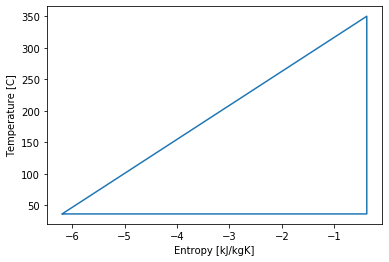

In [0]:
#There are four processes in the Rankine cycle.
P_cold = 0.06 #bara
P_hot = 50.0 #bara
T_hot_superheat = 350.0 #C

import neqsim
from neqsim.thermo.thermoTools import *

fluid_1 = fluid("cpa-statoil")
fluid_1.addComponent("water", 1.0)
fluid_1.setPressure(P_cold, "bara")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")
bubt(fluid_1)
fluid_1.initProperties()
#TPflash(fluid_1)
#The starting point of the cycle is liuqid at the boiling point 
T1 = fluid_1.getTemperature("C")
H1 = fluid_1.getEnthalpy("kJ/kg")
U1 = fluid_1.getInternalEnergy("kJ/kg")
S1 = fluid_1.getEntropy("kJ/kgK")
V1 = fluid_1.getVolume("m3")

#Process 1–2: The working fluid is pumped from low to high pressure. 
fluid_1.setPressure(P_hot, "bara")
PSflash(fluid_1, S1, "kJ/kgK")
T2 = fluid_1.getTemperature("C")
H2 = fluid_1.getEnthalpy("kJ/kg")
U2 = fluid_1.getInternalEnergy("kJ/kg")
S2 = fluid_1.getEntropy("kJ/kgK")
V2 = fluid_1.getVolume("m3")

#Process 2–3: The high-pressure liquid enters a boiler, where it is heated at constant pressure by an external heat source to become a dry saturated vapour.
fluid_1.setTemperature(T_hot_superheat, "C")
TPflash(fluid_1)
T3 = fluid_1.getTemperature("C")
H3 = fluid_1.getEnthalpy("kJ/kg")
U3 = fluid_1.getInternalEnergy("kJ/kg")
S3 = fluid_1.getEntropy("kJ/kgK")
V3 = fluid_1.getVolume("m3")

#Process 3–4: The dry saturated vapour expands through a turbine, generating power. 
fluid_1.setPressure(P_cold, "bara")
PSflash(fluid_1, S3, "kJ/kgK")
T4 = fluid_1.getTemperature("C")
H4 = fluid_1.getEnthalpy("kJ/kg")
U4 = fluid_1.getInternalEnergy("kJ/kg")
S4 = fluid_1.getEntropy("kJ/kgK")
V4 = fluid_1.getVolume("m3")

#Process 4–1: The wet vapour then enters a condenser, where it is condensed at a constant pressure to become a saturated liquid.
fluid_1.setPressure(P_cold, "bara")
bubt(fluid_1)
fluid_1.initProperties()
T5 = fluid_1.getTemperature("C")
H5 = fluid_1.getEnthalpy("kJ/kg")
U5 = fluid_1.getInternalEnergy("kJ/kg")
S5 = fluid_1.getEntropy("kJ/kgK")
V5 = fluid_1.getVolume("m3")

#estimating efficiency
QH = H3-H2
QC = H4-H5
pumpWork = H2-H1
expanderWork= H3-H4
efficiency = (QH-QC)/QH
print("turbine power generated ", expanderWork, " kJ/kg")
print("pump power used ", pumpWork, " kJ/kg")
print("Efficiency: ", efficiency)
efficiency2 = 1.0 - (T1+273.15)/(T3+273.15)
print("Carnot efficiency ",  efficiency2)

#plot results in Ts-diagram
entropy = [S1, S2,S3, S4, S5]
temperature = [T1, T2, T3, T4, T5]
import matplotlib
import matplotlib.pyplot as plt
plt.plot(entropy, temperature);
plt.xlabel('Entropy [kJ/kgK]');
plt.ylabel('Temperature [C]');
plt.show()



#Formulating the Ranking Cycle as a neqsim process

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander
fluid_1 = fluid("cpa")
fluid_1.addComponent("water", 1.0)

fluid_1.setPressure(0.05, "bara")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")

clearProcess()
stream_1 = stream(fluid_1)
stream_1.setSpecification("bubP");
stream_1.run();

pump_1 = pump(stream_1, 50.0)

heater_1 = cooler(pump_1.getOutStream())
heater_1.setSpecification("out stream");

stream_2 = stream(heater_1.getOutStream())
#stream_2.setSpecification("dewP");
stream_2.getThermoSystem().setTemperature(535.49)
stream_2.getThermoSystem().setPressure(50.0)

expander_1 = expander(stream_2, 0.05)
runProcess()

print("low pressure ", stream_1.getPressure(), " bara")
print("low temperature ", (stream_1.getTemperature()-273.15), " C")

print("pump power ", pump_1.getPower(), " W")
print("heater duty ", heater_1.getDuty(), " W")
print("high pressure ", stream_2.getPressure(), " bara")
print("high temperature ", (stream_2.getTemperature()-273.15), " C")

print("expander power ", expander_1.getPower(), " W")

dewt(stream_2.getThermoSystem())

low pressure  0.05  bara
low temperature  37.424466596529896  C
pump power  1429.2425561369164  W
heater duty  -0.5117018767050467  W
high pressure  50.0  bara
high temperature  262.34000000000003  C
expander power  -330958.4563702864  W


535.4902930730977

#Brayton cycle
The Brayton cycle is a thermodynamic cycle named after George Brayton that describes the workings of a constant-pressure heat engine. The original Brayton engines used a piston compressor and piston expander, but more modern gas turbine engines and airbreathing jet engines also follow the Brayton cycle. Although the cycle is usually run as an open system (and indeed must be run as such if internal combustion is used), it is conventionally assumed for the purposes of thermodynamic analysis that the exhaust gases are reused in the intake, enabling analysis as a closed system.

The efficiency of the ideal Brayton cycle is

$\eta = 1 - \frac {T_1}{T_2} = 1 - \left(\frac{P_1}{P_2}\right)^{(\gamma-1)/\gamma} $


https://en.wikipedia.org/wiki/Brayton_cycle

Ideal Brayton cycle:
1. isentropic process – ambient air is drawn into the compressor, where it is pressurized.
2. isobaric process – the compressed air then runs through a combustion chamber, where fuel is burned, heating that air—a constant-pressure process, since the chamber is open to flow in and out.
3. isentropic process – the heated, pressurized air then gives up its energy, expanding through a turbine (or series of turbines). Some of the work extracted by the turbine is used to drive the compressor.
4. isobaric process – heat rejection (in the atmosphere).


                          total                gas                       
           nitrogen      7.8E-1             7.8E-1        [mole fraction]
             oxygen      2.2E-1             2.2E-1        [mole fraction]
                                                                         
            Density                      8.60489E0               [kg/m^3]
      PhaseFraction                            1E0        [mole fraction]
          MolarMass   2.88903E1          2.88903E1              [kg/kmol]
           Z factor                      1.00661E0                    [-]
 Heat Capacity (Cp)                      1.06589E0              [kJ/kg*K]
 Heat Capacity (Cv)                     7.75476E-1              [kJ/kg*K]
     Speed of Sound                       4.9768E2                [m/sec]
           Enthalpy   3.55314E2          3.55314E2                [kJ/kg]
            Entropy  2.04762E-1         2.04762E-1              [kJ/kg*K]
     JT coefficient                   

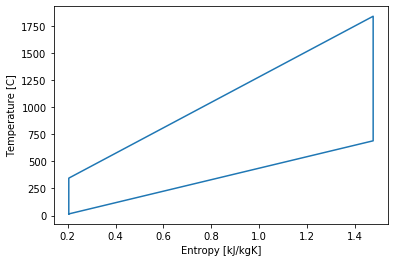

In [0]:
#@markdown Simulation of a Braiton Cycle in neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.standards import ISO6976

T1 = 15.0
P1 = 1.01325

T2 = 30.0
P2 = 15.4

drygas = createfluid('dry gas')
drygas.setPressure(P2, "bara")
drygas.setTemperature(T2, "C")
drygas.setTotalFlowRate(14.8, "kg/sec")
TPflash(drygas)

#printFrame(drygas)

air =  createfluid('air')
air.setPressure(P1, "bara")
air.setTemperature(T1, "C")
air.setTotalFlowRate(630.0, "kg/sec")
TPflash(air)

S1 = air.getEntropy("kJ/kgK")
H1 = air.getEnthalpy("kJ/kg")
V1 = air.getVolume("m3")
P1 = air.getPressure("bara")
T1 = air.getTemperature("C")

# 1. adiabatic process – compression
air.setPressure(P2, "bara")
PSflash(air, S1, "kJ/kgK")
printFrame(air)

S2 = air.getEntropy("kJ/kgK")
H2 = air.getEnthalpy("kJ/kg")
V2 = air.getVolume("m3")
P2 = air.getPressure("bara")
T2 = air.getTemperature("C")


# 2. isobaric process – heat addition
GCVgas = GCV(drygas, 'kJ/kg')
energyCombustion = GCVgas*1000.0*drygas.getFlowRate("kg/sec")
air.setTemperature(1400.0)
PHflash(air, air.getEnthalpy()+energyCombustion, "J")

S3 = air.getEntropy("kJ/kgK")
H3 = air.getEnthalpy("kJ/kg")
V3 = air.getVolume("m3")
P3 = air.getPressure("bara")
T3 = air.getTemperature("C")

# 3. adiabatic process – expansion
air.setPressure(P1, "bara")
PSflash(air, S3,"kJ/kgK")

S4 = air.getEntropy("kJ/kgK")
H4 = air.getEnthalpy("kJ/kg")
V4 = air.getVolume("m3")
P4 = air.getPressure("bara")
T4 = air.getTemperature("C")

# 4. isobaric process – heat rejection
PHflash(air, H1, "kJ/kg")

S5 = air.getEntropy("kJ/kgK")
H5 = air.getEnthalpy("kJ/kg")
V5 = air.getVolume("m3")
P5 = air.getPressure("bara")
T5 = air.getTemperature("C")

idealBrytonEff = 1.0 - T1/T2
airMassFlow = air.getFlowRate("kg/sec")
fuelMassFLow = drygas.getFlowRate("kg/sec")
AFR = airMassFlow/fuelMassFLow
print("air fuel ratio ", AFR, " kg/kg")

print("air inlet flow ", V1 , " m3/sec")
print("fuel inlet flow ", drygas.getFlowRate("kg/sec") , " kg/sec")
print("compressor power ", (H2-H1)*airMassFlow/1e3 , " MW")
print("Heat of combustion ", GCVgas/1e3, " MJ/kg")
print("Turbine power ", (H3-H4)*airMassFlow/1e3, " MW")
print("Temperature of air to turbine ", T3, " C")
print("Temperature of exhaust air ", T4, " C")

powerOutput = (H3-H4)*airMassFlow/1e3 - (H2-H1)*airMassFlow/1e3
print("plant net output ", powerOutput, " MW")
netEfficiency = powerOutput/(energyCombustion/1e6)
print("efficiency ", netEfficiency)
#plot results in Ts-diagram
entropy = [S1, S2,S3, S4, S5]
temperature = [T1, T2, T3, T4, T5]
import matplotlib
import matplotlib.pyplot as plt
plt.plot(entropy, temperature);
plt.xlabel('Entropy [kJ/kgK]');
plt.ylabel('Temperature [C]');
plt.show()

#Stirling cycle
The Stirling cycle is a thermodynamic cycle that describes the general class of Stirling devices. This includes the original Stirling engine that was invented, developed and patented in 1816 by Robert Stirling.

The idealized Stirling[5] cycle consists of four thermodynamic processes acting on the working fluid (See diagram to right):

* 1-2 Isothermal heat addition (expansion).
* 2-3 Isochoric heat removal (constant volume).
* 3-4 Isothermal heat removal (compression).
* 4-1 Isochoric heat addition (constant volume).

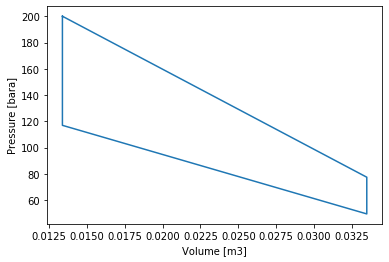

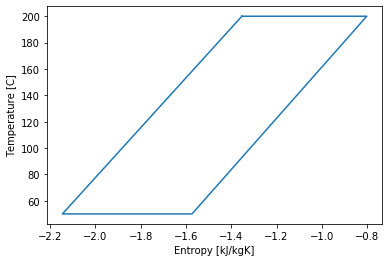

In [0]:
#@markdown Simulation of a Stirling Cycle in neqsim
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater

# The starting point is a fluid at termodynamic equilibrium
P1 = 200.0
T_hot = 200.0
T_cold = 50.0

fluid_1 = fluid("srk")
fluid_1.addComponent("methane", 1.0, "kg/sec")
fluid_1.addComponent("ethane", 0.10, "kg/sec")
fluid_1.setTemperature(T_hot, "C")
fluid_1.setPressure(P1, "bara")
TPflash(fluid_1)
T1 = fluid_1.getTemperature("C")
H1 = fluid_1.getEnthalpy("kJ/kg")
U1 = fluid_1.getInternalEnergy("kJ/kg")
S1 = fluid_1.getEntropy("kJ/kgK")
V1 = fluid_1.getVolume("m3")

# 1-2: Isothermal Expansion. Heat is transferred reversibly from high temperature reservoir at constant temperature TH (isothermal heat addition or absorption). 
V2 = V1*2.5
TVflash(fluid_1, V2, "m3")
T2 = fluid_1.getTemperature("C")
P2 = fluid_1.getPressure("bara")
H2 = fluid_1.getEnthalpy("kJ/kg")
U2 = fluid_1.getInternalEnergy("kJ/kg")
S2 = fluid_1.getEntropy("kJ/kgK")

# 2-3: Isochoric heat removal (constant volume).
fluid_1.setTemperature(T_cold, "C")
TVflash(fluid_1, V2, "m3")

T3 = fluid_1.getTemperature("C")
P3 = fluid_1.getPressure()
H3 = fluid_1.getEnthalpy("kJ/kg")
U3 = fluid_1.getInternalEnergy("kJ/kg")
S3 = fluid_1.getEntropy("kJ/kgK")
V3 = fluid_1.getVolume("m3")

# 3-4  Isothermal heat removal (compression)
V4 = V1
TVflash(fluid_1, V4, "m3")
T4 = fluid_1.getTemperature("C")
P4 = fluid_1.getPressure("bara")
H4 = fluid_1.getEnthalpy("kJ/kg")
U4 = fluid_1.getInternalEnergy("kJ/kg")
S4 = fluid_1.getEntropy("kJ/kgK")

# 4-1  Isochoric heat addition (constant volume).
fluid_1.setTemperature(T_hot, "C")
TVflash(fluid_1, V1, "m3")
T5 = fluid_1.getTemperature("C")
P5 = fluid_1.getPressure("bara")
H5 = fluid_1.getEnthalpy("kJ/kg")
U5 = fluid_1.getInternalEnergy("kJ/kg")
S5 = fluid_1.getEntropy("kJ/kgK")
V5 = fluid_1.getVolume("m3")


volumes = [V1, V2,V3,V4, V5]
pressures = [P1, P2, P3, P4, P5]
entropy = [S1, S2,S3, S4, S5]
temperature = [T1, T2, T3, T4, T5]

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

plt.plot(volumes, pressures);
plt.xlabel('Volume [m3]');
plt.ylabel('Pressure [bara]');
plt.show()

plt.plot(entropy, temperature);
plt.xlabel('Entropy [kJ/kgK]');
plt.ylabel('Temperature [C]');
plt.show()

#Otto cycle
An Otto cycle is an idealized thermodynamic cycle that describes the functioning of a typical spark ignition piston engine. It is the thermodynamic cycle most commonly found in automobile engines.

https://en.wikipedia.org/wiki/Otto_cycle

In [0]:
#@markdown Simulation of a Otto cycle in neqsim

import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.standards import ISO6976

T1 = 15.0
P1 = 1.01325

compressionRatio = 14
T2 = 30.0
P2 = 15.4

petrol = createfluid('dry gas')
petrol.setPressure(P2, "bara")
petrol.setTemperature(T2, "C")
petrol.setTotalFlowRate(22.2, "kg/hr")
TPflash(petrol)

#Process 0–1 intake stroke (green arrow)
air =  createfluid('air')
air.setPressure(P1, "bara")
air.setTemperature(T1, "C")
air.setTotalFlowRate(3100.0, "kg/hr")
TPflash(air)

S1 = air.getEntropy("kJ/kgK")
H1 = air.getEnthalpy("kJ/kg")
V1 = air.getVolume("m3")
P1 = air.getPressure("bara")
T1 = air.getTemperature("C")

# Process 1–2 compression stroke (B on diagrams)
V2 = V1/compressionRatio
VSflash(air, V2, S1, "m3", "kJ/kgK")

S2 = air.getEntropy("kJ/kgK")
H2 = air.getEnthalpy("kJ/kg")
V2 = air.getVolume("m3")
P2 = air.getPressure("bara")
T2 = air.getTemperature("C")


# Process 2–3 ignition phase
GCVgas = GCV(petrol, 'kJ/kg')
energyCombustion = GCVgas*1000.0*petrol.getFlowRate("kg/sec")
VHflash(air, V2, air.getEnthalpy()+energyCombustion, "m3", "J")
#need to implement this in java/python
S3 = air.getEntropy("kJ/kgK")
H3 = air.getEnthalpy("kJ/kg")
V3 = air.getVolume("m3")
P3 = air.getPressure("bara")
T3 = air.getTemperature("C")

# Process 3–4 expansion stroke 
VSflash(air, V1, S3, "m3", "kJ/kgK")

S4 = air.getEntropy("kJ/kgK")
H4 = air.getEnthalpy("kJ/kg")
V4 = air.getVolume("m3")
P4 = air.getPressure("bara")
T4 = air.getTemperature("C")

# Process 4–1 idealized heat rejection
VSflash(air, V1, S1, "m3", "kJ/kgK")

S5 = air.getEntropy("kJ/kgK")
H5 = air.getEnthalpy("kJ/kg")
V5 = air.getVolume("m3")
P5 = air.getPressure("bara")
T5 = air.getTemperature("C")

airMassFlow = air.getFlowRate("kg/sec")
fuelMassFLow = petrol.getFlowRate("kg/sec")
AFR = airMassFlow/fuelMassFLow
print("air fuel ratio ", AFR, " kg/kg")
print("air inlet flow ", V1 , " m3/sec")
print("fuel inlet flow ", petrol.getFlowRate("kg/sec") , " kg/sec")
print("pistion power ", (H3-H4)*airMassFlow , " kW")
print("Heat of combustion ", GCVgas, " kJ/kg")

powerOutput = (H3-H4)*airMassFlow - (H2-H1)*airMassFlow
print("power output ", powerOutput, " kW, ", (powerOutput*1.3596216173)," hp" )

#plot results in Ts-diagram
entropy = [S1, S2,S3, S4, S5]
temperature = [T1, T2, T3, T4, T5]
volumes = [V1, V2,V3, V4, V5]
pressures = [P1, P2, P3, P4, P5]
import matplotlib
import matplotlib.pyplot as plt
plt.plot(entropy, temperature);
plt.xlabel('Entropy [kJ/kgK]');
plt.ylabel('Temperature [C]');
plt.show()

plt.plot(volumes, pressures);
plt.xlabel('Volume [m3]');
plt.ylabel('Pressure [bara]');
plt.show()

NameError: ignored

In [0]:
import neqsim
from neqsim.thermo.thermoTools import *
from neqsim.process import stream,clearProcess,runProcess, pump, heater, cooler, expander, valve, compressor, heater
fluid_1 = fluid("srk")
fluid_1.addComponent("propane", 1.0)

fluid_1.setPressure(15.0, "bara")
fluid_1.setTemperature(30.0, "C")
fluid_1.setTotalFlowRate(1000.0, "kg/hr")

clearProcess()
stream_1 = stream(fluid_1)
stream_1.setSpecification("bubT");
stream_1.run();

JTvalve = valve(stream_1, 1.0)

cooler_1 = cooler(JTvalve.getOutStream())
cooler_1.setSpecification("out stream");

stream_2 = stream(cooler_1.getOutStream())
stream_2.setSpecification("dewT");
stream_2.getThermoSystem().setTemperature(273.15  - 30.0);
stream_2.run()

cooler_1.setOutStream(stream_2);
JTvalve.setOutletPressure(stream_2.getPressure());

compressor_1 = compressor(stream_2, 10.0);
compressor_1.setSpecification("out stream")
compressor_1.setOutletPressure(stream_1.getPressure())

heater = heater(compressor_1.getOutStream())
heater.setPressureDrop(0.07);
heater.setSpecification("out stream");
heater.setOutStream(stream_1);

runProcess()

print("compressor work ", compressor_1.getEnergy(), " W");
print("compressor isentropic ef ", compressor_1.getIsentropicEfficiency()*100.0, " %");
print("cooler duty ", cooler_1.getEnergyInput(), " W");
print("heater duty ", heater.getEnergyInput(), "W");
